## Kopi for å endre på plot etter evaluering av lavterskel

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs


In [7]:
import sys
sys.path.insert(0, '/Users/johannemehren/Desktop/master/enso/')

import plot_func as f

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
path = '/Users/johannemehren/Desktop/filer/'
ds = xr.open_dataset(path +'gridfile_test.nc')
ds2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')
obs = xr.open_dataset(path + '/GPS-RO__CP_LR_5x5_2007-2018.nc')

In [10]:
ds_slice_mm = ds.sel(lat=slice(-20,20), time=slice('2007-12-01', '2018-11-30'))
obs_slice_mm = obs.sel(lat = slice(-20,20), time=slice('2007-12-01', '2018-11-30'))
ds2_slice_mm = ds2.sel(lat=slice(-20,20), time=slice('2007-12-01', '2018-11-30'))

In [11]:
ds_slice = ds.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))
obs_slice = obs.sel(lat = slice(-20,20))
ds2_slice = ds2.sel(lat=slice(-20,20), time=slice('2007-01-01', '2018-12-31'))

In [12]:
obs_mon = obs_slice.resample(time='M').mean()

In [13]:
era5_mm = ds_slice_mm.groupby('time.month').mean(dim='time')

erai_mm = ds2_slice_mm.groupby('time.month').mean(dim='time')
obs_mm = obs_slice_mm.groupby('time.month').mean(dim='time')

/Users/johannemehren/opt/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
d_lrz = ds_slice.tpz[:,:,:].mean(axis=0)-obs_mon.LR_z[:,:,:].mean(axis=0)
d_lrt = ds_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)

d2_lrz = ds2_slice.tpz[:,:,:].mean(axis=0)-obs_mon.LR_z[:,:,:].mean(axis=0)
d2_lrt = ds2_slice.tpt[:,:,:].mean(axis=0)-obs_mon.LR_T[:,:,:].mean(axis=0)

obs_mean_lrz = obs_mon.LR_z[:,:,:].mean(axis=0)
obs_mean_lrt = obs_mon.LR_T[:,:,:].mean(axis=0)

In [38]:
d_lrz_round = d_lrz.round(decimals=1)
obs_mean_lrz

<xarray.DataArray 'LR_z' (lat: 9, lon: 72)>
array([[16.380243, 16.327194, 16.263226, 16.19866 , 16.110273, 16.02351 ,
        15.914473, 15.824016, 15.762207, 15.708043, 15.687642, 15.678799,
        15.685237, 15.755683, 15.848918, 15.995283, 16.104816, 16.239159,
        16.349262, 16.426872, 16.482672, 16.472471, 16.51459 , 16.495064,
        16.45292 , 16.399426, 16.335634, 16.303644, 16.217936, 16.16961 ,
        16.186346, 16.215038, 16.26142 , 16.349113, 16.415321, 16.480951,
        16.52503 , 16.548103, 16.567146, 16.60373 , 16.599033, 16.623312,
        16.633959, 16.624199, 16.62342 , 16.618958, 16.59828 , 16.594194,
        16.581976, 16.580212, 16.5852  , 16.58293 , 16.599861, 16.599194,
        16.591728, 16.593843, 16.617456, 16.62814 , 16.647081, 16.650011,
        16.64592 , 16.637789, 16.620985, 16.607643, 16.586094, 16.572102,
        16.546047, 16.513893, 16.502522, 16.476383, 16.44914 , 16.429104],
       [16.59991 , 16.558653, 16.512354, 16.452173, 16.390738, 16.34006 ,
        16.265846, 16.21444 , 16.195488, 16.175804, 16.189907, 16.220112,
        16.252647, 16.306583, 16.38263 , 16.467169, 16.523476, 16.57517 ,
        16.623995, 16.628483, 16.63137 , 16.598974, 16.599342, 16.57177 ,
        16.565128, 16.5271  , 16.498238, 16.494133, 16.488503, 16.494759,
        16.51961 , 16.578514, 16.601803, 16.644133, 16.675562, 16.712402,
        16.714987, 16.704762, 16.714832, 16.702692, 16.714537, 16.718708,
        16.73156 , 16.736143, 16.734858, 16.728104, 16.71651 , 16.718996,
        16.69607 , 16.69286 , 16.693436, 16.682257, 16.699312, 16.704882,
        16.710022, 16.710241, 16.716637, 16.733486, 16.754705, 16.77236 ,
        16.768982, 16.758163, 16.755898, 16.754309, 16.743843, 16.740688,
        16.726337, 16.711128, 16.689253, 16.677794, 16.662   , 16.626602],
       [16.713924, 16.688864, 16.672985, 16.643318, 16.59853 , 16.564596,
        16.535534, 16.504646, 16.492603, 16.479084, 16.49969 , 16.513332,
        16.545311, 16.589287, 16.625322, 16.682737, 16.714132, 16.729443,
        16.713692, 16.704319, 16.695274, 16.661213, 16.639677, 16.626753,
        16.623497, 16.607944, 16.608725, 16.612036, 16.627367, 16.644402,
        16.684366, 16.718456, 16.723715, 16.745056, 16.750452, 16.755705,
        16.753433, 16.752941, 16.750513, 16.752817, 16.749708, 16.74606 ,
        16.767271, 16.770351, 16.78276 , 16.780342, 16.772186, 16.759687,
        16.728838, 16.714571, 16.689335, 16.686413, 16.680862, 16.674406,
        16.668913, 16.674034, 16.690948, 16.705687, 16.720709, 16.73644 ,
        16.749582, 16.752949, 16.755836, 16.759087, 16.74971 , 16.75327 ,
        16.748466, 16.750093, 16.748848, 16.737846, 16.733711, 16.725342],
       [16.75486 , 16.756973, 16.753881, 16.726927, 16.715961, 16.693144,
        16.674309, 16.665924, 16.651575, 16.646437, 16.65117 , 16.657516,
        16.686012, 16.719402, 16.747618, 16.760912, 16.768892, 16.77752 ,
        16.765669, 16.762712, 16.742514, 16.7192  , 16.710527, 16.694794,
        16.671942, 16.686018, 16.6793  , 16.691648, 16.69504 , 16.708607,
        16.709663, 16.727943, 16.74584 , 16.752188, 16.744589, 16.749327,
        16.740335, 16.748596, 16.736334, 16.730156, 16.733335, 16.730907,
        16.745821, 16.760172, 16.76774 , 16.768534, 16.756632, 16.74138 ,
        16.713997, 16.672298, 16.634226, 16.613379, 16.587196, 16.579016,
        16.5752  , 16.577837, 16.592249, 16.624525, 16.639328, 16.672768,
        16.699915, 16.703726, 16.703049, 16.706455, 16.702139, 16.697678,
        16.70078 , 16.716066, 16.730736, 16.7486  , 16.763094, 16.75621 ],
       [16.753958, 16.753468, 16.760658, 16.740751, 16.738054, 16.727854,
        16.713367, 16.708773, 16.699991, 16.696867, 16.706055, 16.713116,
        16.724308, 16.752428, 16.774368, 16.786476, 16.779034, 16.77969 ,
        16.772926, 16.76965 , 16.757378, 16.745117, 16.729065, 16.731394,
        16.71447 , 16.705923, 16.704712, 16.712315, 16.714478, 16.70378 ,
        16.724464, 16.729933, 

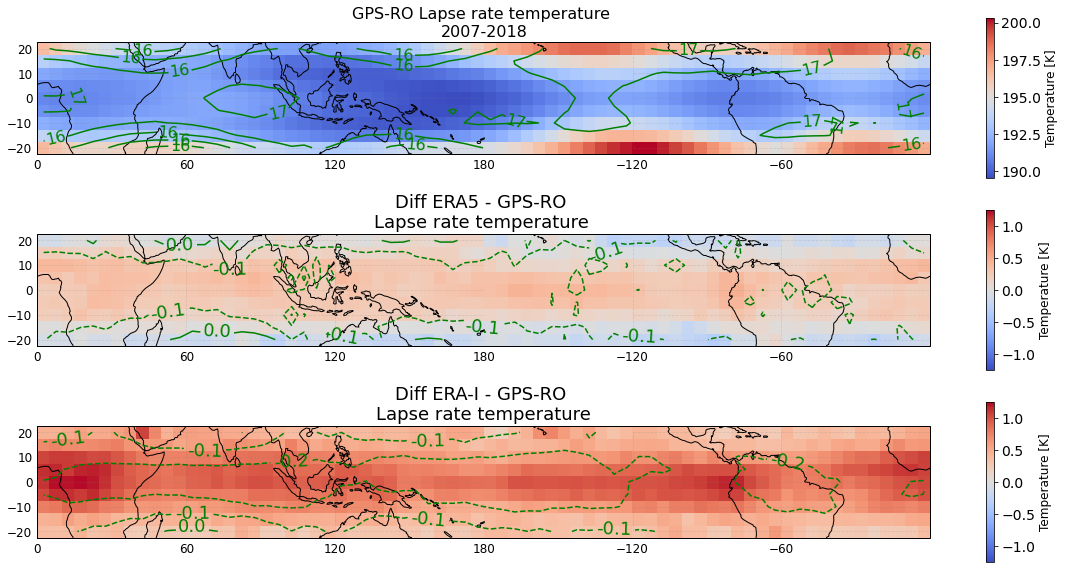

In [72]:
f1 = f.three_plot_contour(obs_mean_lrt, obs_mean_lrz, d_lrt, d_lrz, d2_lrt, d2_lrz, 'GPS-RO Lapse rate temperature \n2007-2018', 
                  'Diff ERA5 - GPS-RO \nLapse rate temperature ', 'Diff ERA-I - GPS-RO \nLapse rate temperature', 
                 vmin=-1.25, vmax=1.25)
#f1.savefig('LR_mean_zt.pdf')

In [54]:
d_cpz = ds_slice.ctpz[:,:,:].mean(axis=0)-obs_mon.CP_z[:,:,:].mean(axis=0)
d_cpt = ds_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)

d2_cpz = ds2_slice.ctpz[:,:,:].mean(axis=0)-obs_mon.CP_z[:,:,:].mean(axis=0)
d2_cpt = ds2_slice.ctpt[:,:,:].mean(axis=0)-obs_mon.CP_T[:,:,:].mean(axis=0)

obs_mean_cpz = obs_mon.CP_z[:,:,:].mean(axis=0)
obs_mean_cpt = obs_mon.CP_T[:,:,:].mean(axis=0)

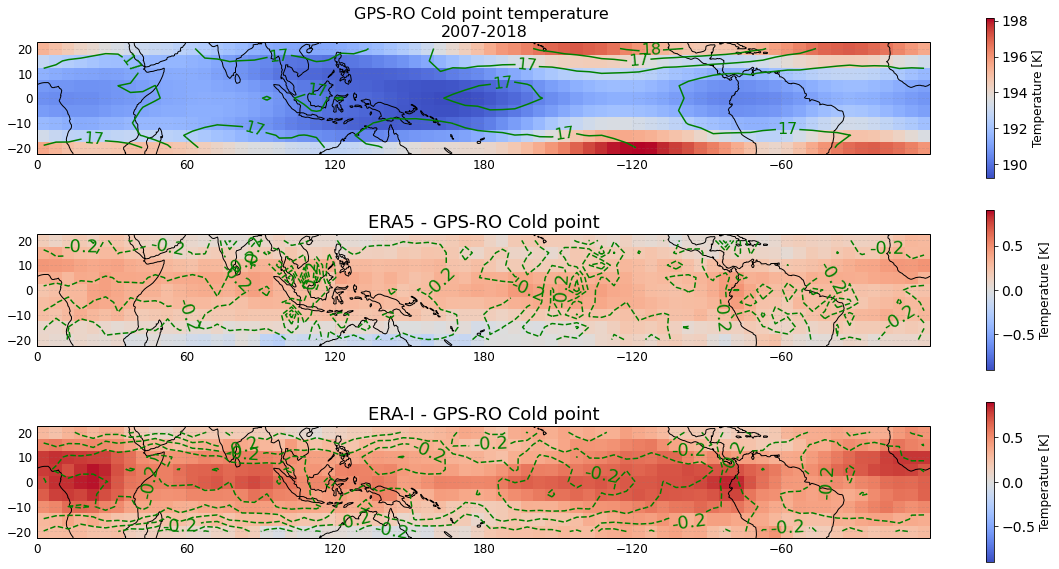

In [74]:
f2 = f.three_plot_contour(obs_mean_cpt, obs_mean_cpz, d_cpt, d_cpz, d2_cpt, d2_cpz, 'GPS-RO Cold point temperature \n2007-2018',
                'ERA5 - GPS-RO Cold point', 'ERA-I - GPS-RO Cold point', vmin=-0.9, vmax=0.9)

#f2.savefig('CP_mean_zt.png')

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

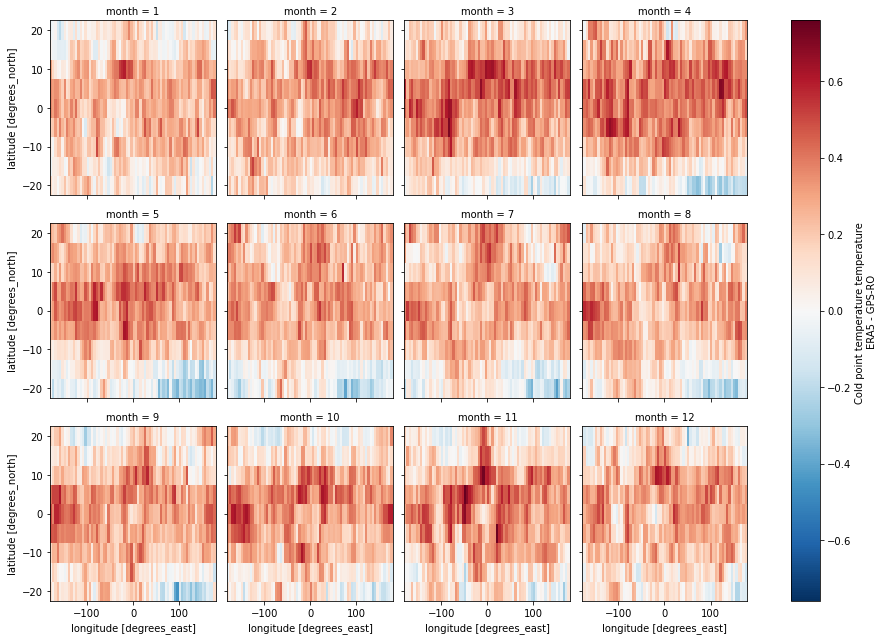

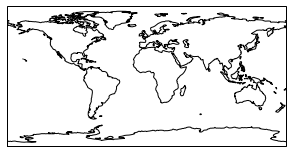

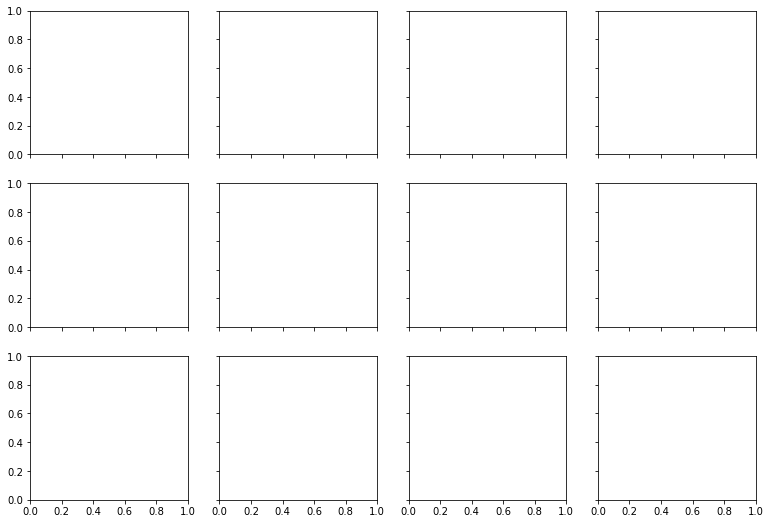

In [75]:
d1 = era5_mm.ctpt[:,:,:] - obs_mm.CP_T[:,:,:]
ss1 = d1.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA5 - GPS-RO'})



map_proj = ccrs.PlateCarree(central_longitude = 0)
data_proj = ccrs.PlateCarree(central_longitude = 0)
geodetic_proj = ccrs.PlateCarree(central_longitude = 0)

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = d1.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA5 - GPS-RO'},
                        levels=[0,200,400,600,800,1000],
                        transform=data_proj)

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

#plt.savefig('figs/cpt_era5_monthly_latlon.pdf')

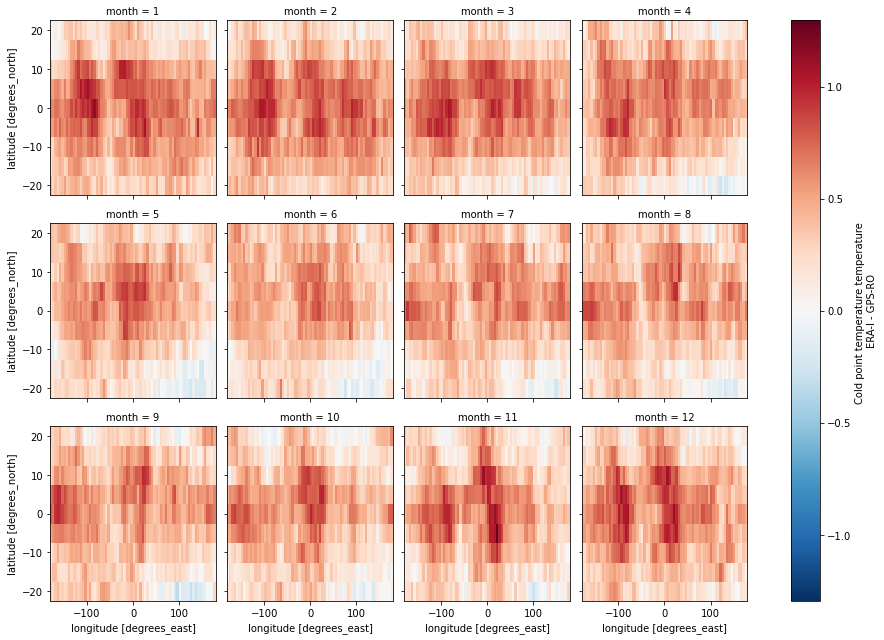

In [76]:
d2 = erai_mm.ctpt[:,:,:] - obs_mm.CP_T[:,:,:]
#d2.plot(x='lon', y='lat', col='month', col_wrap=4)
d22 = d2.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Cold point temperature temperature \nERA-I - GPS-RO'})
#plt.savefig('figs/cpt_erai_monthly_latlon.pdf')

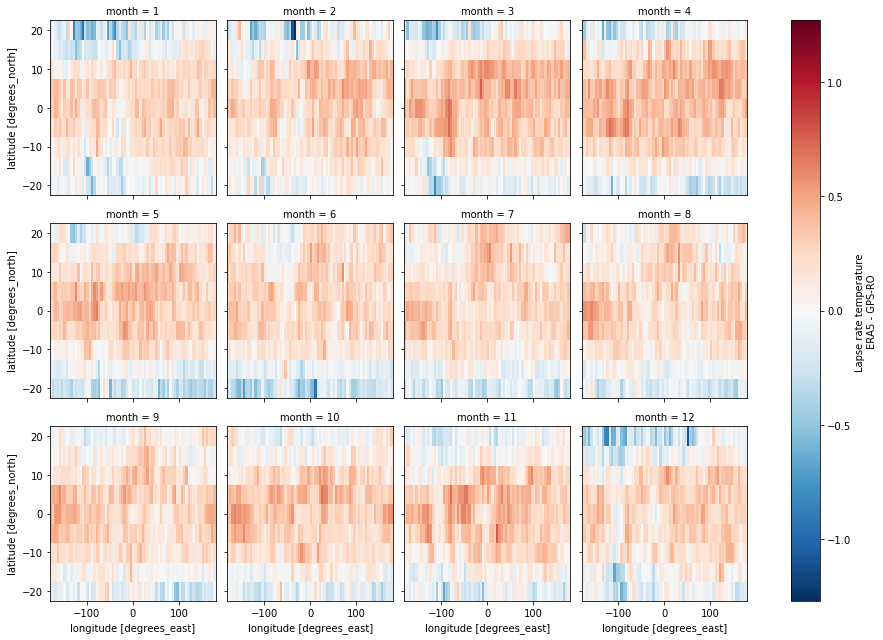

In [12]:
d3 = era5_mm.tpt[:,:,:] - obs_mm.LR_T[:,:,:]
#d3.plot(x='lon', y='lat', col='month', col_wrap=4)

d33 = d3.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA5 - GPS-RO'})
#plt.savefig('figs/lrt_era5_monthly_latlon.pdf')

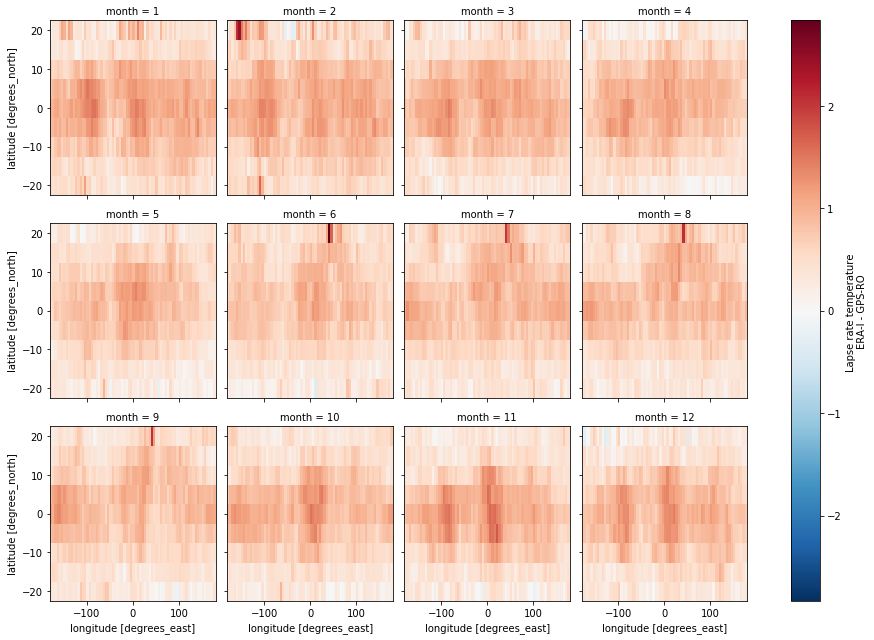

In [13]:
d4 = erai_mm.tpt[:,:,:] - obs_mm.LR_T[:,:,:]
#d4.plot(x='lon', y='lat', col='month', col_wrap=4)

d44 = d4.plot.pcolormesh('lon', 'lat', col='month', col_wrap=4, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'})
#plt.savefig('figs/lrt_erai_monthly_latlon.pdf')

In [58]:
era5_s = ds_slice_mm.groupby('time.season').mean(dim='time')
erai_s = ds2_slice_mm.groupby('time.season').mean(dim='time')
obs_s = obs_slice_mm.groupby('time.season').mean(dim='time')

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


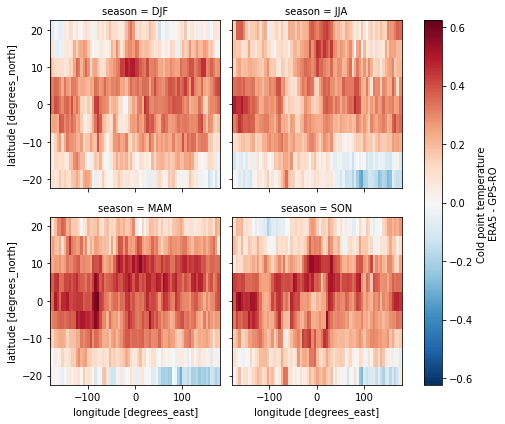

In [59]:
s1 = era5_s.ctpt[:,:,:] - obs_s.CP_T[:,:,:]
ss1 = s1.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Cold point temperature \nERA5 - GPS-RO'})


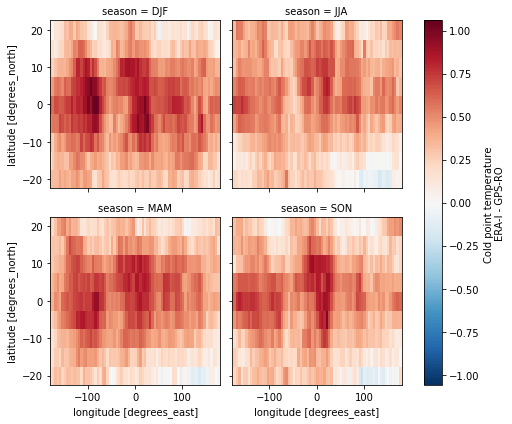

In [60]:
s2 = erai_s.ctpt[:,:,:] - obs_s.CP_T[:,:,:]
ss2 = s2.plot.pcolormesh('lon', 'lat', col = 'season', col_wrap=2, 
                         cbar_kwargs={'label': 'Cold point temperature \nERA-I - GPS-RO'})


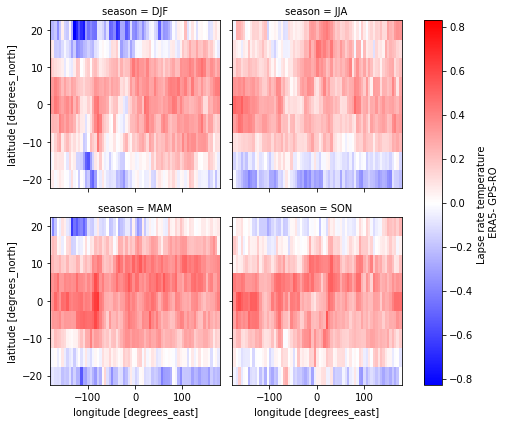

In [61]:
s3 = era5_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss3 = s3.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Lapse rate temperature \n ERA5- GPS-RO'}, cmap='bwr')



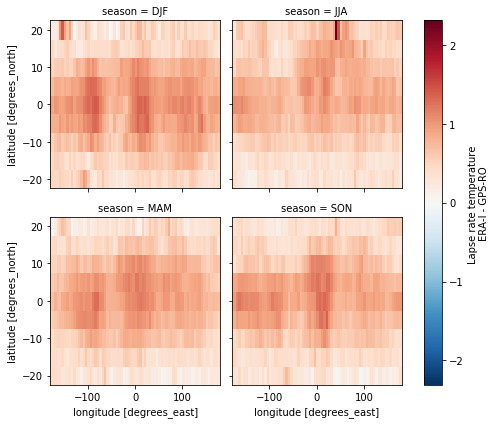

In [62]:
s4 = erai_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss4 = s4.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                         cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'})


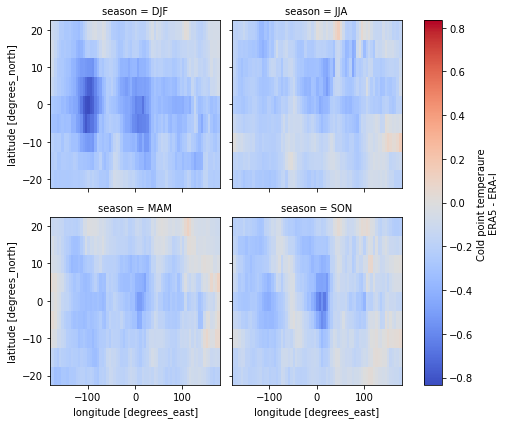

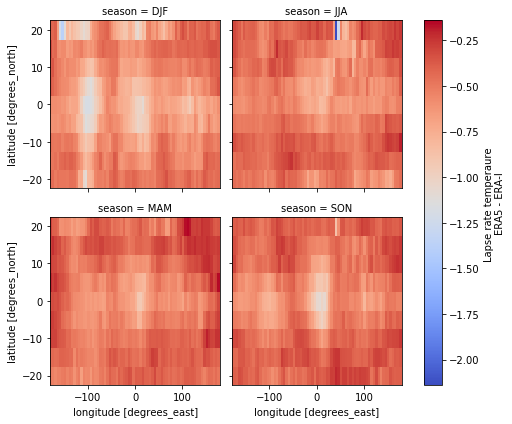

In [63]:
g1 = era5_s.ctpt[:,:,:] - erai_s.ctpt[:,:,:]
g2 = era5_s.tpt[:,:,:] - erai_s.tpt[:,:,:]


gg1 = g1.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                        cbar_kwargs={'label' : 'Cold point temperaure \nERA5 - ERA-I'}, cmap='coolwarm')

gg2 = g2.plot.pcolormesh('lon', 'lat', col='season', col_wrap=2, 
                        cbar_kwargs={'label' : 'Lapse rate temperaure \nERA5 - ERA-I'}, cmap='coolwarm')


In [64]:
d_cpt_rean = ds_slice.ctpt[:,:,:].mean(axis=0) - ds2_slice.ctpt[:,:,:].mean(axis=0)
d_cptz_rean = ds_slice.ctpz[:,:,:].mean(axis=0) - ds2_slice.ctpz[:,:,:].mean(axis=0)
d_lrt_rean = ds_slice.tpt[:,:,:].mean(axis=0)-ds2_slice.tpt[:,:,:].mean(axis=0)
d_lrtz_rean = ds_slice.tpz[:,:,:].mean(axis=0)-ds2_slice.tpz[:,:,:].mean(axis=0)


In [65]:
f1 = f.three_plot_contour(obs_mean_cpt, d_cpt_rean, d_cptz_rean*1000, d_lrt_rean,d_lrtz_rean*1000, 'GPS-RO CPT', 'ERA5 - ERA-I CPT', 
                  'ERA5 - ERA-I LRT', 
                 vmin=-1.5, vmax=0.6)

AttributeError: 'Figure' object has no attribute 'three_plot_contour'

/uio/hume/student-u62/johanmeh/anaconda3/envs/py36/lib/python3.6/site-packages/xarray/plot/facetgrid.py:365: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


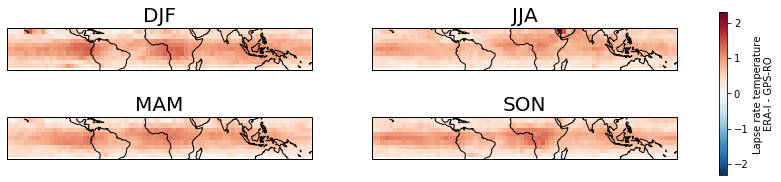

In [154]:
s4 = erai_s.tpt[:,:,:] - obs_s.LR_T[:,:,:]
ss4 = s4.plot( col='season', col_wrap=2,
                         subplot_kws={'projection': ccrs.PlateCarree()},
             cbar_kwargs={'label': 'Lapse rate temperature \nERA-I - GPS-RO'}, figsize=(15,3)
)


ss4.axes.flat[0].set_title('DJF', fontsize=20)
ss4.axes.flat[1].set_title('JJA', fontsize=20)
ss4.axes.flat[2].set_title('MAM', fontsize=20)
ss4.axes.flat[3].set_title('SON', fontsize=20)

for ax in ss4.axes.flat:
    ax.coastlines()
    #ax.gridlines()
    #ax.set_title(['DJF', 'MAM'], fontsize=18)

plt.savefig('test_coastlines_season.pdf')